# Decision Tree

# House Price Prediction
Dataset: Boston dataset provided in sklearn (originally from UCI repository)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')#this will suppress warnin

## Loading dataset

In [2]:
house_dataset = load_boston()
house = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)
house['MEDV']=house_dataset.target

In [3]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Column/Attributes in Dataset:

1. CRIM: Per capita crime rate by town
2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
3. INDUS: Proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: Nitric oxide concentration (parts per 10 million)
6. RM: Average number of rooms per dwelling
7. AGE: Proportion of owner-occupied units built prior to 1940
8. DIS: Weighted distances to five Boston employment centers
9. RAD: Index of accessibility to radial highways
10. TAX: Full-value property tax rate per 10,000
11. PTRATIO: Pupil-teacher ratio by town
12. B: 1000(Bk — 0.63)², where Bk is the proportion of (people of African American descent) by town
13. LSTAT: Percentage of lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s


In [5]:
print("Structure of dataset: ",house.shape)

Structure of dataset:  (506, 14)


## Feature Selection

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.


In [6]:
X=house.drop('MEDV',axis=1)
y=house.MEDV

#### spliting Data 

we will split the data into train and test at ratio 80:20 %

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#### Structure of sets

In [8]:
print("shape of training set: ",x_train.shape)#shape of training set 
print("shape of test set: ",x_test.shape)#shape of test set

shape of training set:  (404, 13)
shape of test set:  (102, 13)


## Model

for model initialization we gone use DecisionTreeRegressor to perform regression on the given dataset.

In [9]:
model=DecisionTreeRegressor(max_leaf_nodes=20,random_state=123)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=20, random_state=123)

### Prediction and Accuracy

In [10]:
y_pred=model.predict(x_test)

In [11]:
print('Accuracy on test set: {:.2f} %'.format(model.score(x_test,y_test)*100))

Accuracy on test set: 86.80 %


In regression, R-Squared is the most popular measure of goodness of fit. A value of R-Sqaured closer to 1, will indicate better fitment.

In [12]:
print("R-Squared = {}".format(r2_score(y_test, y_pred)))

R-Squared = 0.8679605772828624


#### plot

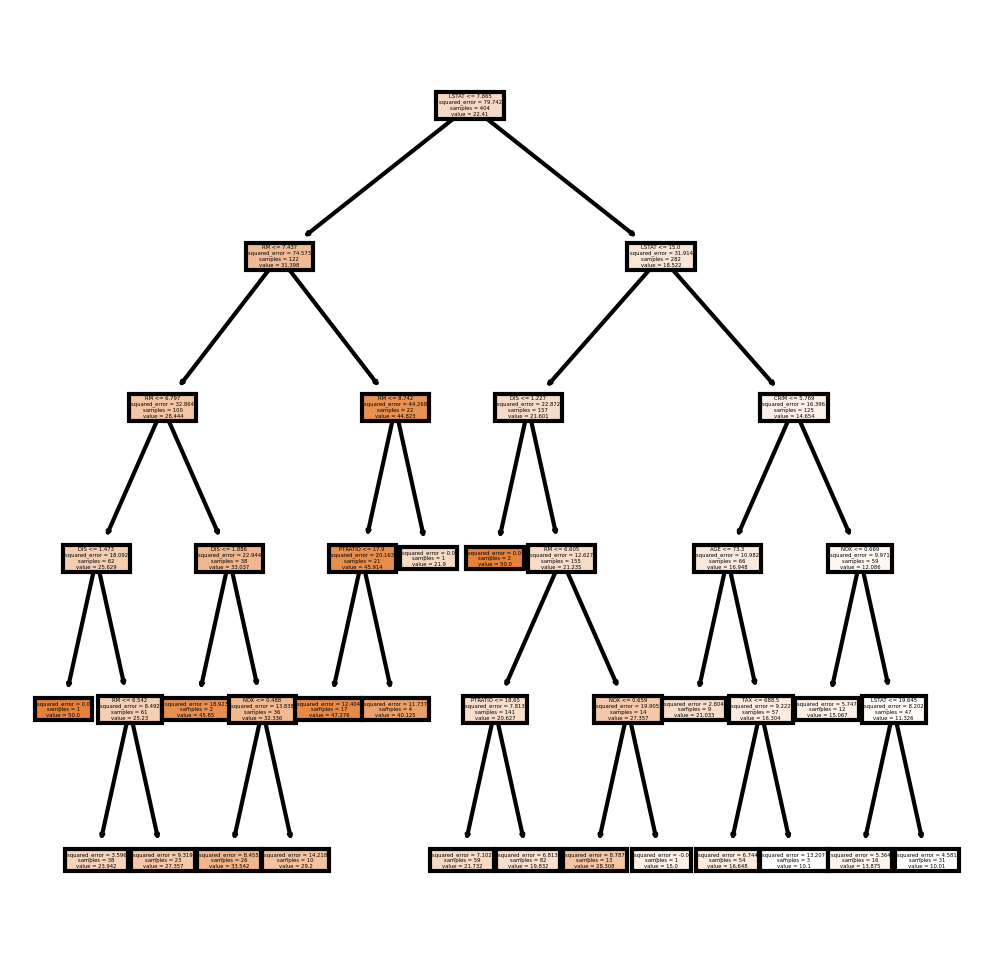

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = X.columns, 
               class_names='MEDV',
               filled = True);

## Feature Importance

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. Feature importance is applied after the model is trained, you only "analyze" and observe which values have been more relevant in your trained model. Moreover, you will see that all features_importances_ sums to 1, so the importance is seen as a percentage too. This also provided details on how model selects features for particular tasks.

(-1.0, 13.0)

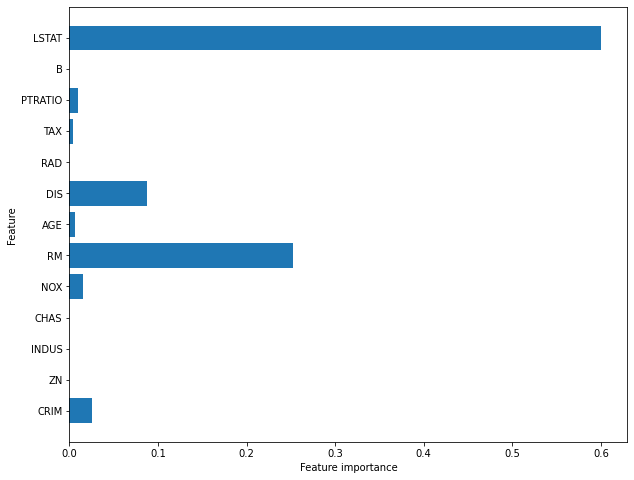

In [14]:
plt.figure(figsize=(10,8))
n_features = len(X.columns)#number of features
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

The model gave LSTAT feature the highest preference and RM at next.